# [2주차] Basic Machine Learning(2)
---

# 04) Multi variable linear regression (다변수 선형회귀)

### Hypothesis
H(x1,x2,x3) = w1x1 + w2x2 + w3x3 + b
- 변수의 개수만큼 가중치의 개수들도 늘어남
- matrix의 곱셈(Dot Product)을 활용해서 간단화

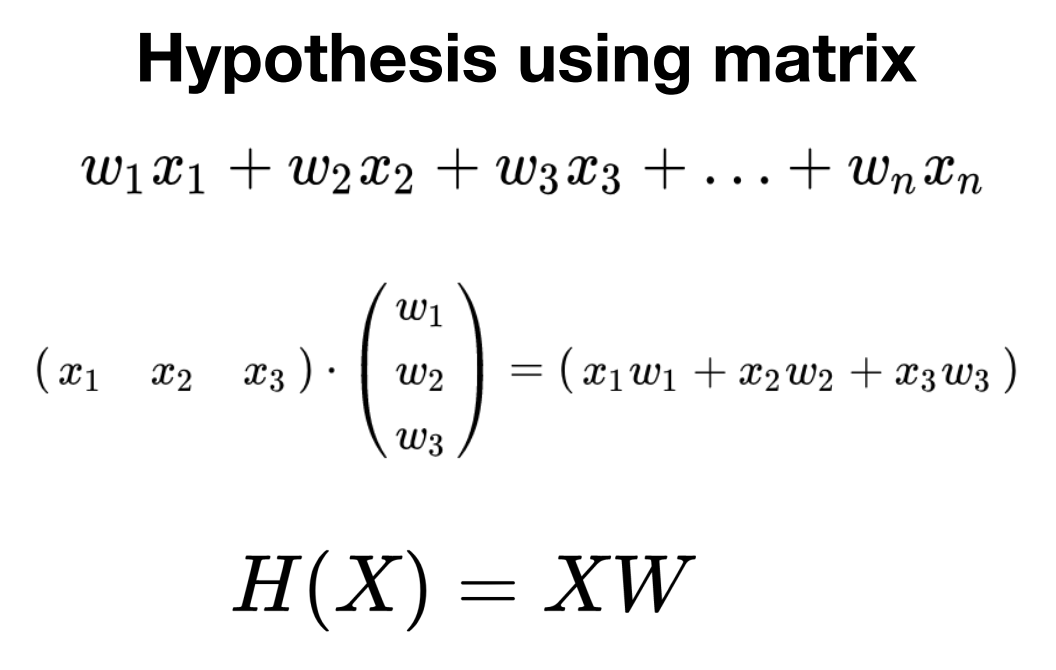

다중변수의 선형회귀의 가설은 행렬의 곱을 이용하여 H(X) = XW로 나타낸다.

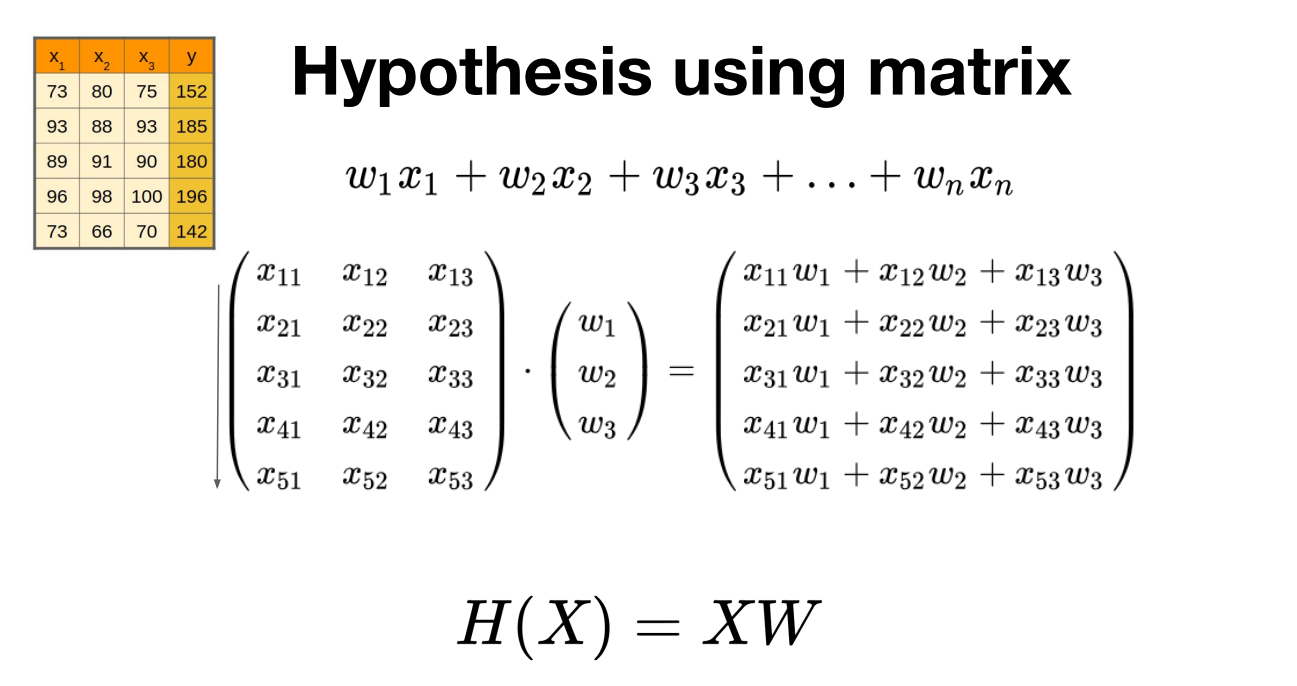

- 데이터의 개수(x의 열) == 가중치의 행 수(w의 행)
- w의 크기: 입력데이터의 col 개수 && 출력데이터의 col 개수로 결정

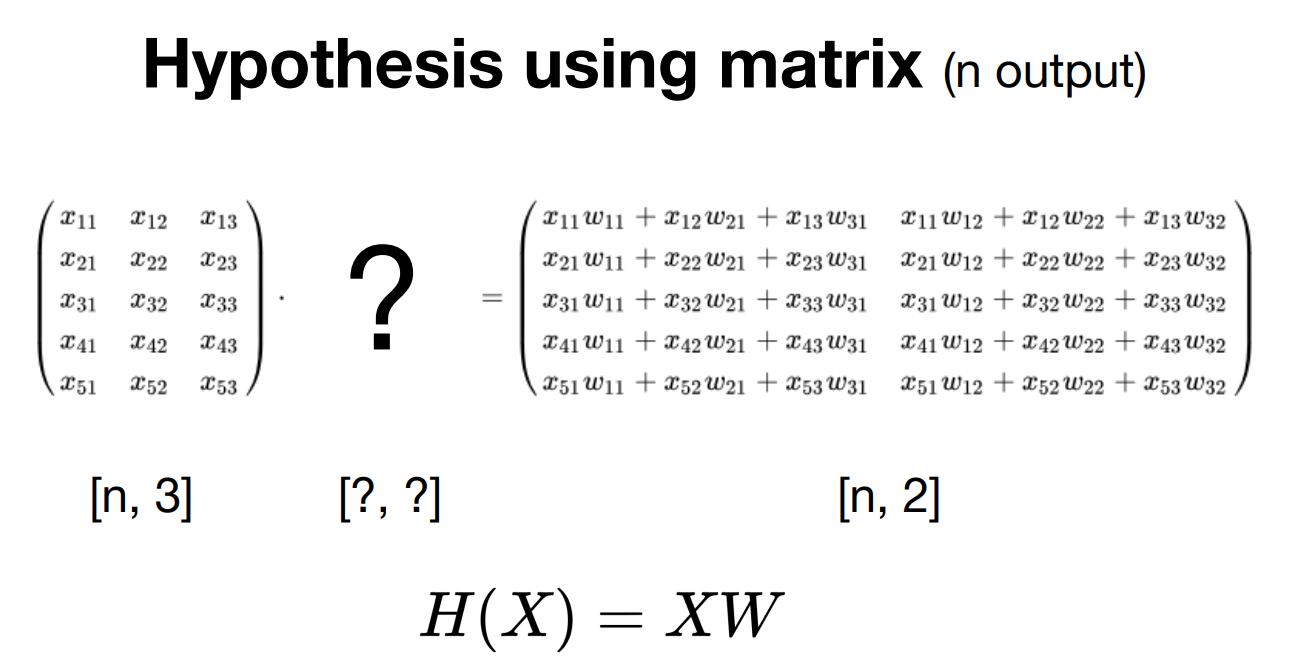

---

In [2]:
import tensorflow as tf
import numpy as np

In [1]:
data = np.array([
    [73., 80., 75., 152.],
    [93., 88., 93., 185.],
    [89., 91., 90., 180.],
    [96., 98., 100., 196.],
    [73., 66., 70., 142.]
], dtype=np.float32)

# slice data
X = data[:, :-1] # [행,열]
y = data[:, [-1]]
print(X)
print(y)

W = tf.Variable(tf.random.normal([3,1])) # x개수, y개수
b = tf.Variable(tf.random.normal([1]))
print(W)
print(b)

# hypothesis, prediction function
def predict(X):
    return tf.matmul(X,W) + b

learning_rate = 0.000001
n_epochs = 2000
for i in range(n_epochs+1):
    with tf.GradientTape() as tape:
        cost = tf.reduce_mean((tf.square(predict(X) - y)))
        
    W_grad, b_grad = tape.gradient(cost, [W,b])
    
    W.assign_sub(learning_rate * W_grad)
    b.assign_sub(learning_rate * b_grad)
    
    if i%100 == 0:
        print("{:5}|{:10.4f}".format(i, cost.numpy())
        

SyntaxError: unexpected EOF while parsing (1163747976.py, line 37)

아래와 같이 matrix를 사용하면 간단하고 효율적으로 나타낼 수 있다.

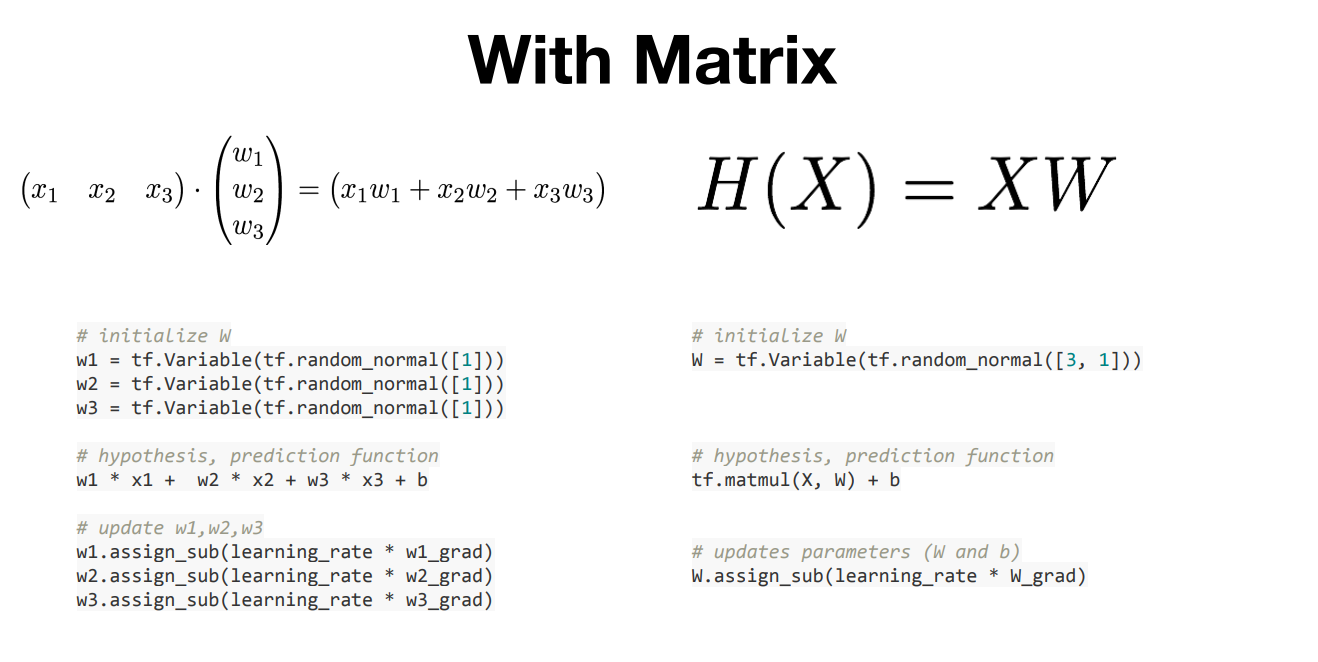

___

# 05) Logistic regression

## Classification
- Binary Classification (Pass/Fail, Not Spam/Spam, Real/Fake, ...)
- To start with ML, you must encode variable [0,1]

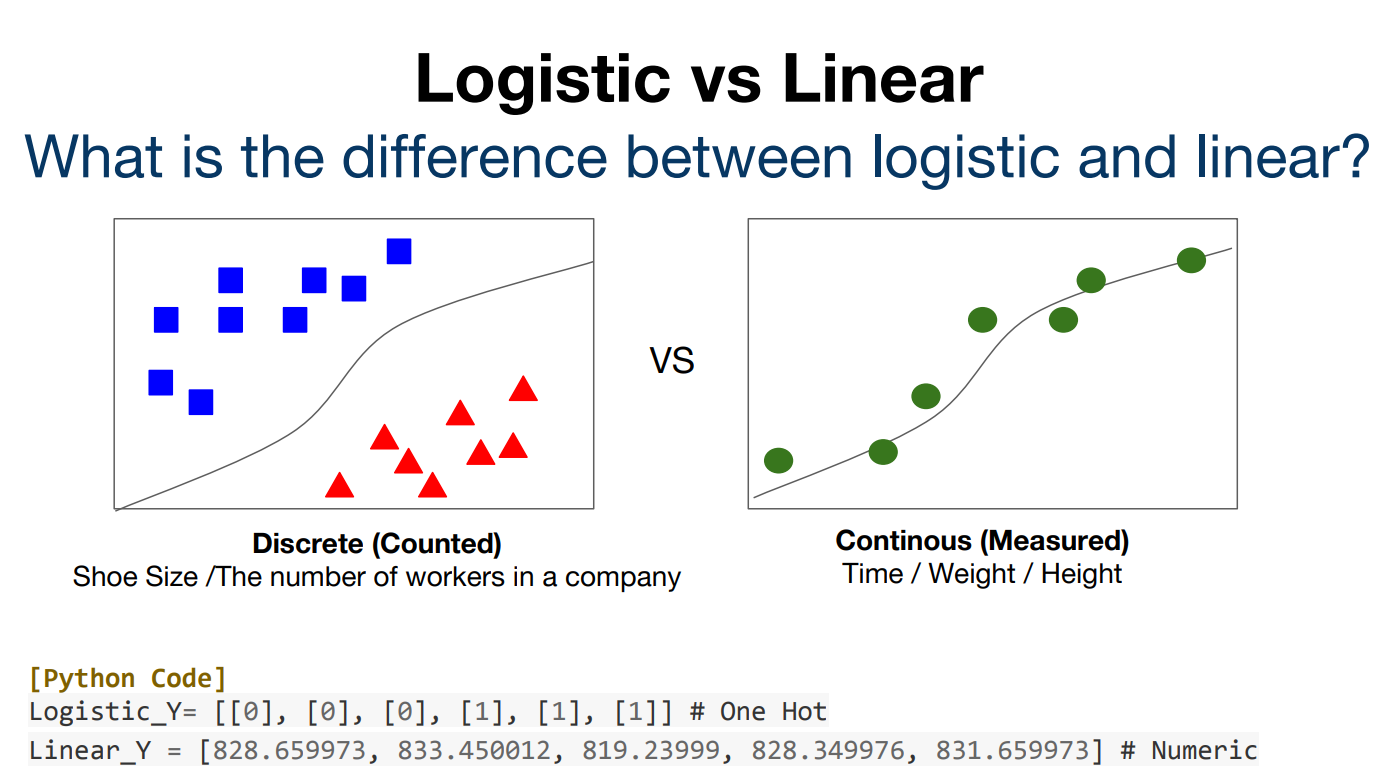

---
## How to solve?

우리가 원하는 실수(z)값을 **Sigmoid 함수**을 이용해서 0~1의 값으로 나타낼 수 있다.

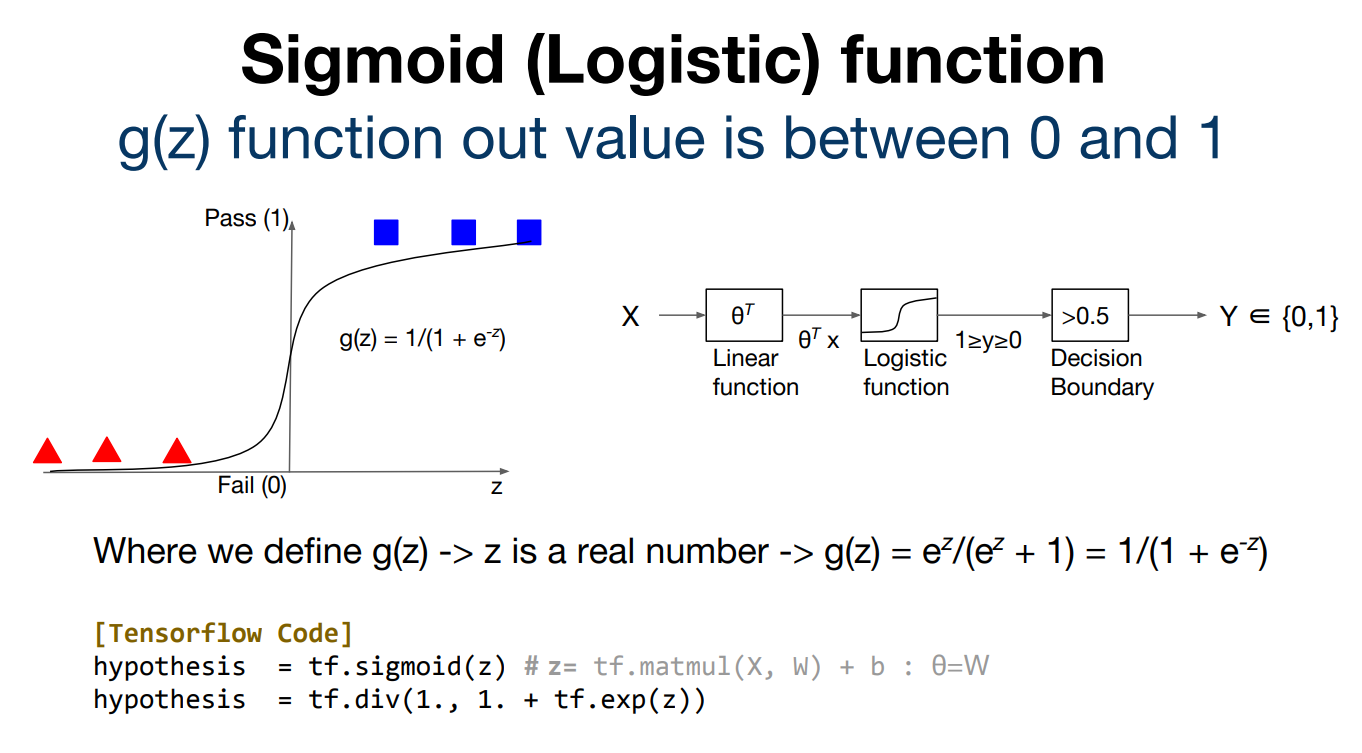

---

**Logistic function**을 이용해서 도출된 hypothesis를 **decision boundary(hypothesis > 0.5)** 를 거쳐 0과 1의 값으로 나타낼 수 있다.

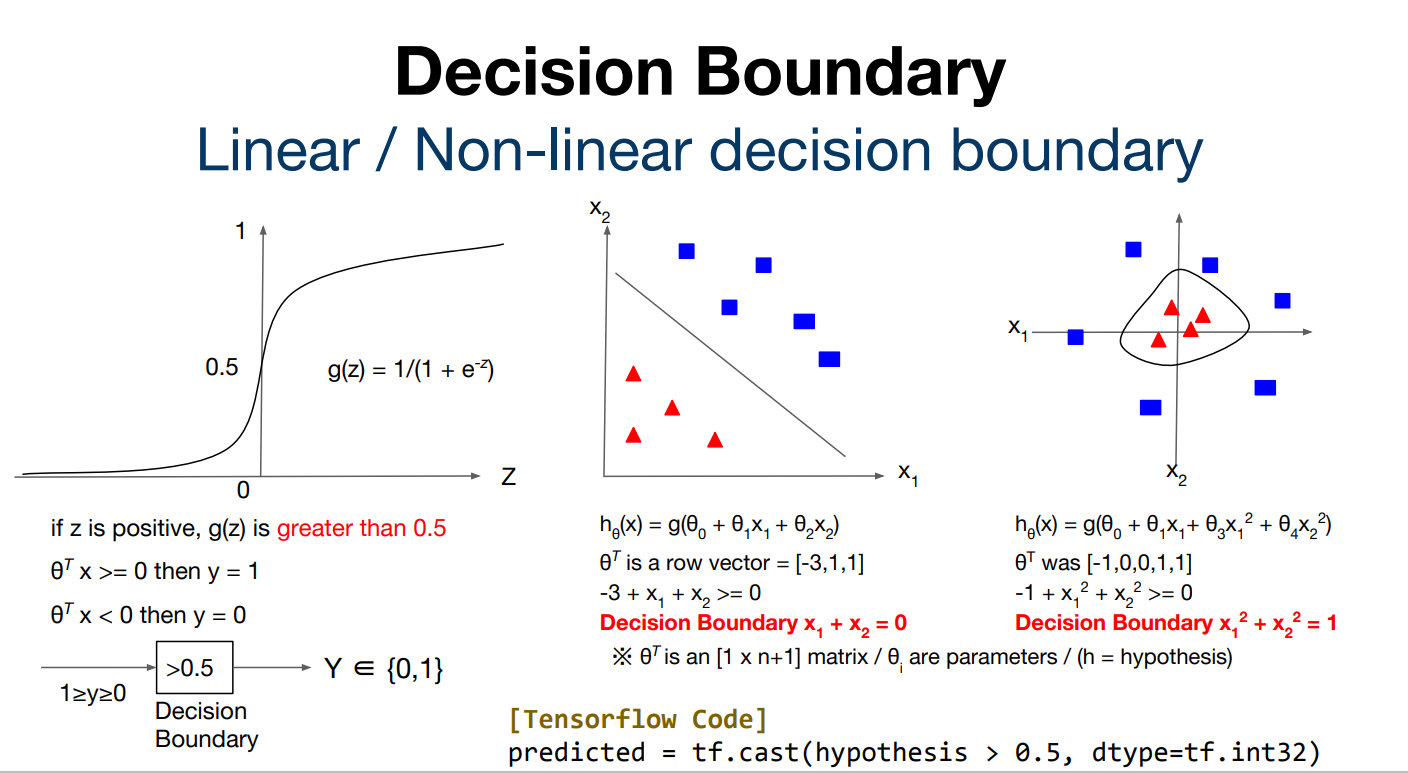

## Cost Function 
the cost function to fit the parameters(Θ) <br>
랜덤으로 만들어진 w(Θ) 값을 최적의 파라미터로 만드는 함수

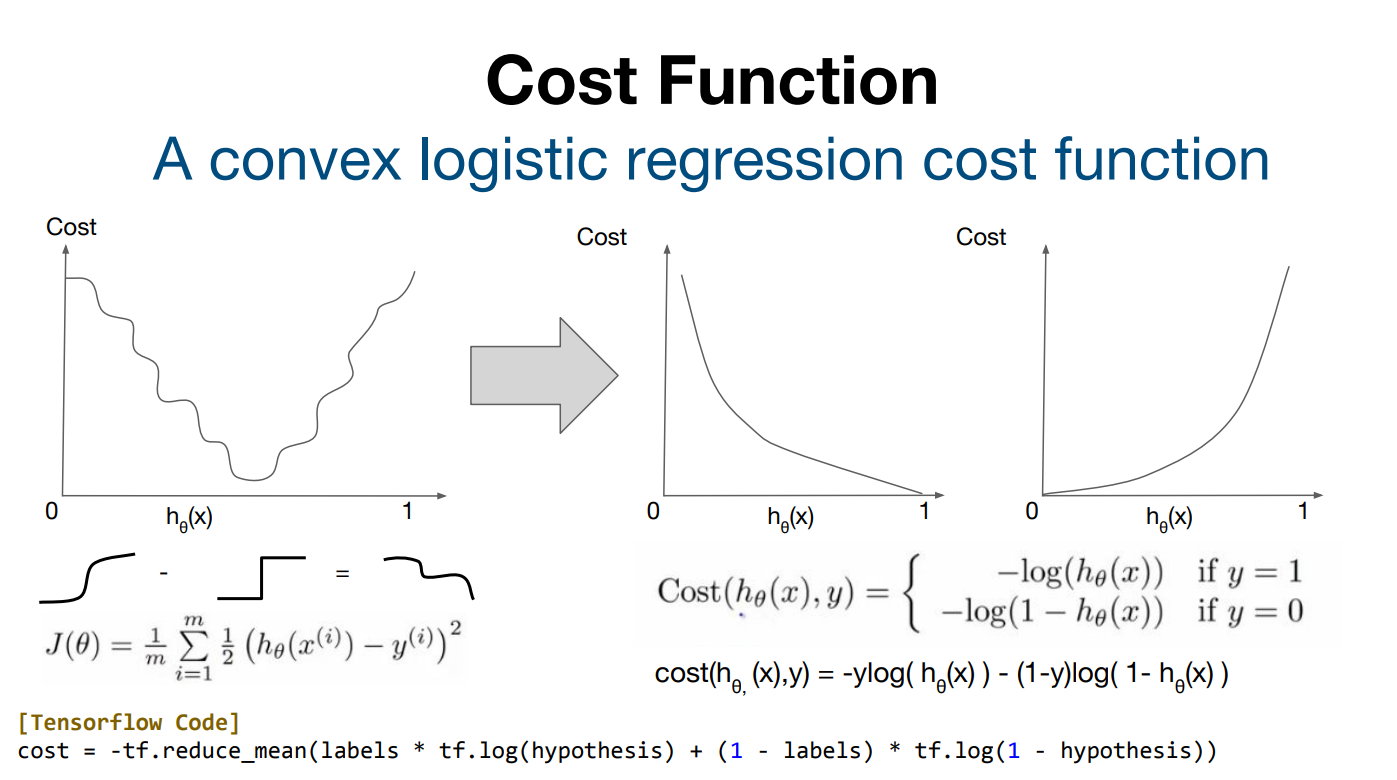

최적의 값을 갖기 위해 Convex(볼록)한 구조를 가진 cost function을 만들어야 한다. (로그함수에 값을 대입)

In [2]:
def loss_fn(hypothesis, labels):
    cost = -tf.reduce_mean(labels * tf.log(hypothesis) + (1-labels) * tf.log(1-hypothesis))
    return cost